# SD212: Graph mining
## Lab 5: Hierarchical clustering

In this lab, you will learn to analyse the hierarchical structure of a graph. 

## Import

In [1]:
from IPython.display import SVG

In [2]:
import numpy as np
from scipy import sparse

In [3]:
# if you get any error, please update scikit-network!
from sknetwork.data import load_netset, karate_club
from sknetwork.hierarchy import LouvainHierarchy, BiLouvainHierarchy, Paris, BiParis, cut_straight
from sknetwork.ranking import PageRank, BiPageRank, top_k
from sknetwork.linalg import normalize
from sknetwork.utils import membership_matrix
from sknetwork.visualization import svg_graph, svg_digraph, svg_dendrogram

## Data

We will work on the following graphs (see the [NetSets](https://graphs.telecom-paristech.fr/Home_page.html#netsets-section) collection for details):
* Openflights (graph)
* WikiVitals (digraph)
* Cinema (bigraph)

In [4]:
openflights = load_netset('openflights')
wikivitals = load_netset('wikivitals')
cinema = load_netset('cinema')

## 1. Graphs

## Karate Club


The [karate club graph](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) provides ground-truth clusters.

In [5]:
graph = karate_club(True)

In [6]:
adjacency = graph.adjacency
position = graph.position
labels_true = graph.labels

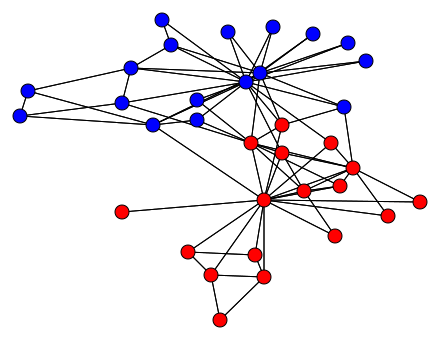

In [7]:
image = svg_graph(adjacency, position, labels=labels_true)
SVG(image)

## To do

* Cluster the graph by the hierarchical Louvain algorithm.
* Display the dendrogram.
* How many clusters are there at depth 2?

In [8]:
louvain = LouvainHierarchy()

In [9]:
dendrogram = louvain.fit_transform(adjacency)

In [10]:
test = adjacency.toarray()

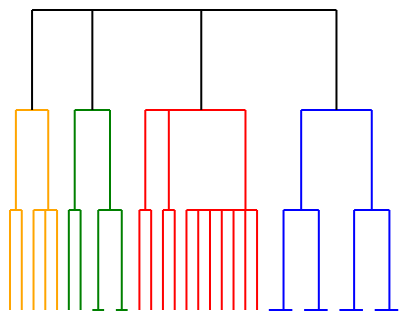

In [11]:
image = svg_dendrogram(dendrogram)
SVG(image)

## To do

* Cluster the graph by the Paris algorithm.
* Display the dendrogram.
* Display the graph with the top-2 clusters. How many nodes are misclassified compared to the ground truth?
* Display the graph with the top-4 clusters and the corresponding aggregate dendrogram.

**Hint:** Check the parameters of the function ``cut_straight``.

In [12]:
paris = Paris()

In [13]:
dendrogram = paris.fit_transform(adjacency)

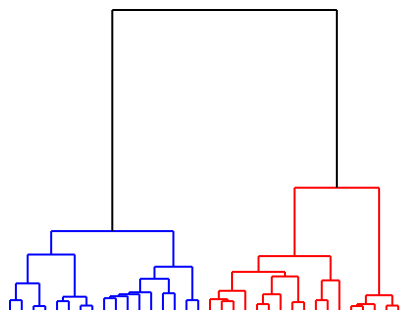

In [14]:
image = svg_dendrogram(dendrogram)
SVG(image)

In [15]:
label2, dendrogram2 = cut_straight(dendrogram, n_clusters = 2 , return_dendrogram = True)
#image = svg_graph(adjacency, position, labels=label2)
#SVG(image)

In [16]:
label2

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

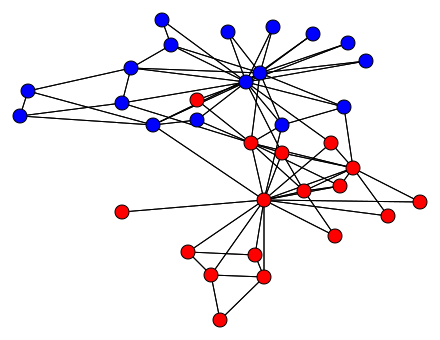

In [17]:
image = svg_graph(adjacency, position, labels=label2)
SVG(image)

In [18]:
vector_error2 = [label2!=labels_true]
errors2 = np.count_nonzero(vector_error2)

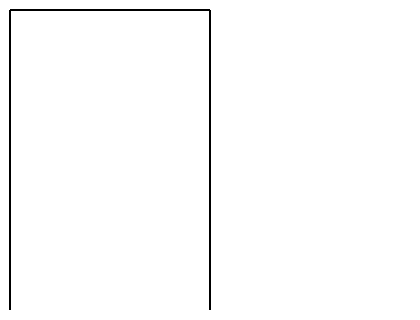

In [19]:
image = svg_dendrogram(dendrogram2)
SVG(image)

Depth 4

In [20]:
label4, dendrogram4 = cut_straight(dendrogram, n_clusters = 4 , return_dendrogram = True)

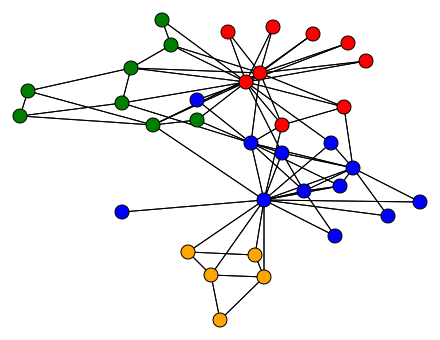

In [21]:
image = svg_graph(adjacency, position, labels=label4)
SVG(image)

In [22]:
vector_error4 = [label4!=labels_true]
errors4 = np.count_nonzero(vector_error4)

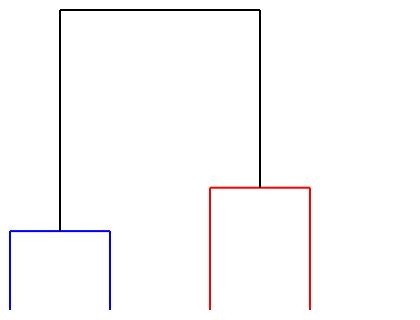

In [23]:
image = svg_dendrogram(dendrogram4)
SVG(image)

In [24]:
label3, dendrogram3 = cut_straight(dendrogram, n_clusters = 3 , return_dendrogram = True)


In [25]:
unique, counts3  = np.unique(label3, return_counts=True)

In [26]:
counts3

array([17, 12,  5])

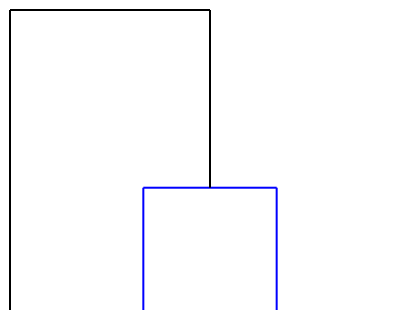

In [81]:
image = svg_dendrogram(dendrogram3)
SVG(image)

## Openflights


In [27]:
graph = openflights

In [28]:
adjacency = graph.adjacency
position = graph.position
names = graph.names

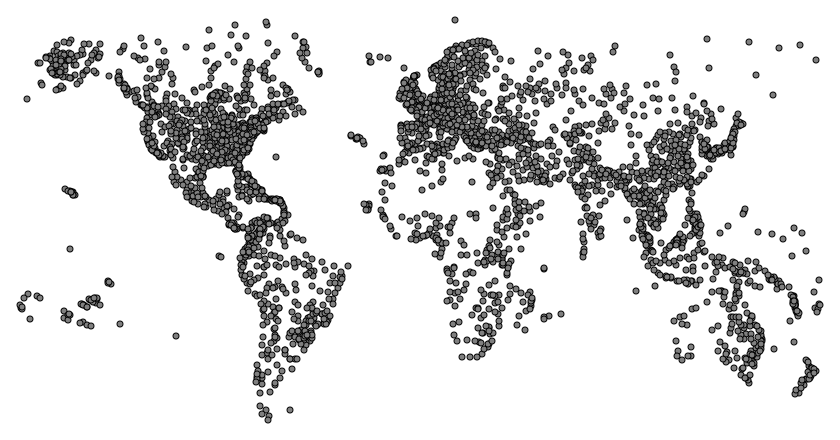

In [29]:
image = svg_graph(adjacency, position, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

## To do

* Display the same world map with the top-10 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-50 clusters found by Paris, with the name of the top airport  (in traffic) of each cluster. <br>**Hint:** Use the parameters ``rotate``, ``n_clusters`` and ``scale`` for better visualization of the dendrogram.

In [30]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
labels, dend2 = cut_straight(dendrogram, n_clusters = 10, return_dendrogram = True)


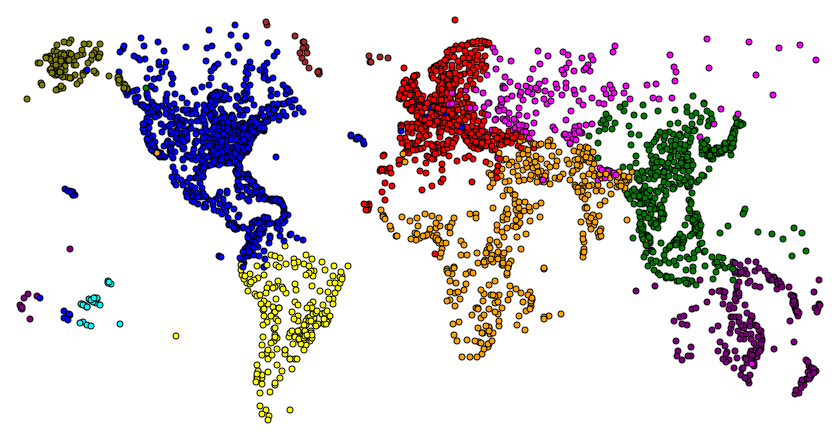

In [31]:
image = svg_graph(adjacency, position, labels = labels, width=800, height=400, node_size=3, display_edges=False)
SVG(image)

In [32]:
labels, dend2 = cut_straight(dendrogram, n_clusters = 50, return_dendrogram = True)
labels_unique, counts = np.unique(labels, return_counts=True)
top = []
n = adjacency.shape[0]
nb_flights = adjacency.dot(np.ones(n))

In [33]:
for i in range(len(np.unique(labels))):
    index = np.where(labels==i,1,0)
    top.append(np.argmax(nb_flights*index))

In [34]:
#names[top]

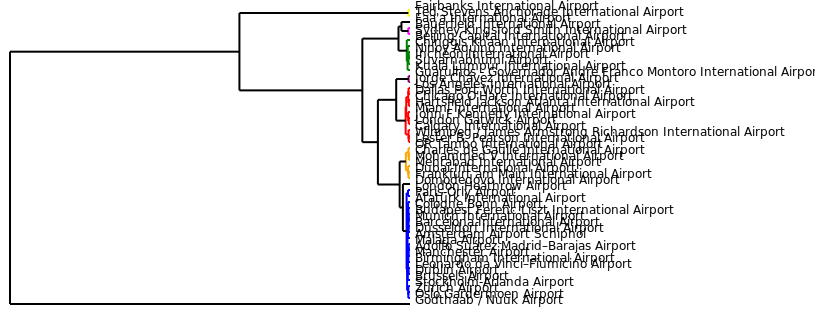

In [35]:
image = svg_dendrogram(dend2, names[top], rotate = True, n_clusters = 10  )
#image = svg_dendrogram(dend2, names[top], rotate = True, scale = 2, n_clusters = 10 )
SVG(image)

## 2. Digraphs

## Wikipedia Vitals

In [36]:
graph = wikivitals

In [37]:
adjacency = graph.adjacency
names = graph.names

## To do

* Cluster the graph by the Paris algorithm.
* Give the size and top-5 articles of each of the top-25 clusters found by Paris.
* Display the aggregate dendrogram formed by the top-25 clusters, with the name of the top article of each cluster.

**Hint:** Use Personalized PageRank to get the top nodes of a cluster.

In [38]:
paris = Paris()
dendogram = paris.fit_transform(adjacency)

In [39]:
labels, dend2 = cut_straight(dendrogram, n_clusters = 25, return_dendrogram = True)

In [40]:
unique, counts3  = np.unique(labels, return_counts=True)

In [41]:
counts3

array([474, 225, 223, 203, 199, 188, 182, 182, 179, 172, 132, 126, 114,
        95,  92,  84,  63,  40,  38,  25,  23,  21,   8,   6,   3])

In [42]:
print(len(labels))

3097


In [43]:
seed = []
arg = []
scores = []
for i in np.unique(labels):
    arg.append(np.argwhere(labels == i))

for i in np.unique(labels):
    seed_i = {j:1 for j in arg[i].ravel()}
    seed.append(seed_i)

In [44]:
np.unique(labels)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24])

In [45]:
scores = []
for i in np.unique(labels):
    pagerank = PageRank()
    score_i = pagerank.fit_transform(adjacency, seed[i])
    scores.append(score_i)

list_max = []
for i in np.unique(labels):
    mask = labels == i
    scores_mask = scores[i] * mask
    max_per_cluster = scores_mask.argsort()[-5:][::-1]
    #print(max_per_cluster)
    list_max.append(max_per_cluster)

#print(list_max)

for i in np.unique(labels_unique):
    print(f"Top 5 by label {i}:\n")
    for j in list_max[i]:
        #print(scores[j])
        print(names[j])
    print("-----------------")

In [46]:
print(len(labels))
print(len(scores[0]))

3097
10012


In [47]:
#########Another code - martin 

In [48]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
labels,dendrogram2 = cut_straight(dendrogram, n_clusters = 25, return_dendrogram=True)
labels_unique, counts = np.unique(labels, return_counts=True)

In [49]:
#####################################################
labels_unique, counts = np.unique(labels, return_counts=True)
# List the top-5 pages of each cluster in terms of Personalized PageRank (with restart in the cluster).
top = []
pagerank = PageRank()
for cluster_idx in labels_unique:
    node_cluster = np.argwhere(labels==cluster_idx).ravel()
    seed = {e:1 for e in node_cluster}
    scores = pagerank.fit_transform(adjacency,seeds=seed)
    top_names_idx = node_cluster[top_k(scores[node_cluster], 5)]
    top.append(list(names[top_names_idx]))
top

[['Taxonomy (biology)', 'Animal', 'Plant', 'Cretaceous', 'Chordate'],
 ['The New York Times',
  'Time (magazine)',
  'Jazz',
  'Romanticism',
  'Igor Stravinsky'],
 ['Earth', 'Kelvin', 'Physics', 'Sun', 'Electron'],
 ['Mathematics',
  'Real number',
  'Function (mathematics)',
  'Complex number',
  'Integer'],
 ['Psychology', 'Pregnancy', 'Immune system', 'Infection', 'Nervous system'],
 ['Plato', 'Karl Marx', 'Age of Enlightenment', 'Law', 'Socialism'],
 ['Australia', 'Indonesia', 'Europe', 'Philippines', 'New Zealand'],
 ['Roman Empire', 'Byzantine Empire', 'Renaissance', 'Egypt', 'Ancient Rome'],
 ['Islam', 'Iran', 'Iraq', 'Persian language', 'Syria'],
 ['Russia', 'Germany', 'Italy', 'Ottoman Empire', 'Ukraine'],
 ['Water',
  'Industrial Revolution',
  'Precipitation',
  'Petroleum',
  'Global warming'],
 ['China', 'Chinese language', 'Japan', 'Ming dynasty', 'Beijing'],
 ['Spain', 'Brazil', 'Mexico', 'Spanish language', 'Argentina'],
 ['World War II', 'Soviet Union', 'World War I',

In [50]:
top1 = [i[0] for i in top] 

In [51]:
# Display the aggregate dendrogram formed by the top-25 clusters, with the name of the top article of each cluster.

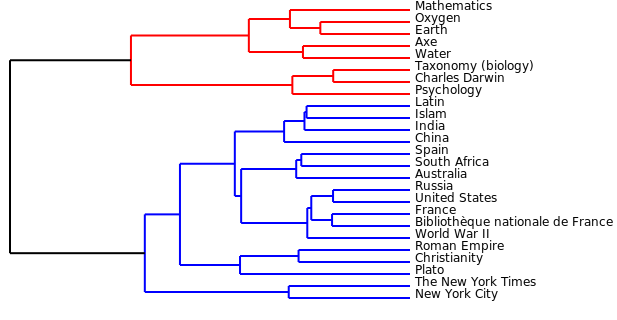

In [52]:
image = svg_dendrogram(dendrogram2, top1, rotate = True  )
SVG(image)

## To do

* Complete the following function that returns the nested clusters from a target node in a dendrogram.
* Give the size and top-5 articles of each nested cluster from the article **Riverboat**.

In [53]:
def get_cluster_nested(dendrogram: np.ndarray, node: int): 
    '''Get nested clusters of a node.
    
    Parameters
    ----------
    dendrogram: 
        Dendrogram
    node:
        Target node
        
    Returns
    -------
    cluster_nested: list of list
        Nested clusters, as a partition of the set of nodes (see the example below). 
        
    Example
    -------
    >>> dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])
    >>> get_cluster_nested(dendrogram, 0)
    [[0], [1], [2, 3]]
    '''
    # n is the number of nodes
    n = dendrogram.shape[0] + 1
    #print(f'n : {n}\n')
    cluster = {i: [i] for i in range(n)}
    #print(f"cluster: {cluster}\n")
    cluster_nested = [[node]]
    cluster_index = node
    
    print("##########")
    for t in range(n - 1):
        i = int(dendrogram[t][0])
        j = int(dendrogram[t][1])
        #print(f"i = {i} and j = {j}")
        # to be completed
        #cluster[n + t] = cluster.pop(i) + cluster.pop(j)
        if node in cluster[i]:
            cluster_nested.append(cluster[j])
        if node in cluster[j]:
            cluster_nested.append(cluster[i])
        cluster[n + t] = cluster.pop(i) + cluster.pop(j)
        """
        print(f"cluster in iter {t} : {cluster}\ncluster nested {cluster_nested}\n")
        for element_cluster in cluster:
            print(f"elem clus {element_cluster}")
            if node in cluster[element_cluster] :
                print(f"cluster_nested[-1] : {cluster_nested[-1]}\n")
                print(f"cluster[element_cluster] : {cluster[element_cluster]}\n")
                #if (cluster_nested[-1] != cluster[element_cluster]):
                if (np.array(cluster_nested).ravel() != np.array(cluster[element_cluster])):
                    #print(f"cluster_nested[t] : {cluster_nested[t]}\n")
                    #print(f"cluster[element_cluster] : {cluster[element_cluster]}\n")
                    print(f"cluster_nested[t] : {cluster_nested[t]}\n")
                    print(f"list(set(cluster[element_cluster]) - set(cluster_nested[t])) : {list(set(cluster[element_cluster]) - set(cluster_nested[t]))}\n")
                    #cluster_nested.append(cluster[element_cluster].remove(list(cluster_nested[t])))
                    #cluster_nested.append(np.subtract(cluster[element_cluster], cluster_nested[t]))
                    cluster_nested.append(list(set(cluster[element_cluster]) - set(cluster_nested[t])))
        
        """
        """
        for element_cluster in cluster 
            if (j!=node and i!=node):
                cluster_nested.append(cluster[n + t])
        """
        #print(f"#########\n")
    return cluster_nested

In [54]:
dendrogram = np.array([[0, 1, 1, 2], [2, 3, 1, 2], [4, 5, 1, 4]])

In [55]:
get_cluster_nested(dendrogram, 0)

##########


[[0], [1], [2, 3]]

In [56]:
dendrogram = paris.fit_transform(adjacency)

In [57]:
node = 10000

In [58]:
names[node]

'Riverboat'

In [59]:
cluster_nested = get_cluster_nested(dendrogram, node)

##########


Second point : Give the size and top-5 articles of each nested cluster from the article Riverboat.

In [60]:
print(len(cluster_nested))

15


In [61]:
paris = Paris()
dendrogram = paris.fit_transform(adjacency)
labels,dendrogram2 = cut_straight(dendrogram, n_clusters = 25, return_dendrogram=True)
labels_unique, counts = np.unique(labels, return_counts=True)

In [62]:
cluster_i = []
for nested_i in cluster_nested:
    cluster_i += nested_i
    node_cluster = np.array(cluster_i)
    seed = {e:1 for e in node_cluster}
    scores = pagerank.fit_transform(adjacency,seeds=seed)
    top_names_idx = node_cluster[top_k(scores[node_cluster], 5)]
    top.append(list(names[top_names_idx]))
top

[['Taxonomy (biology)', 'Animal', 'Plant', 'Cretaceous', 'Chordate'],
 ['The New York Times',
  'Time (magazine)',
  'Jazz',
  'Romanticism',
  'Igor Stravinsky'],
 ['Earth', 'Kelvin', 'Physics', 'Sun', 'Electron'],
 ['Mathematics',
  'Real number',
  'Function (mathematics)',
  'Complex number',
  'Integer'],
 ['Psychology', 'Pregnancy', 'Immune system', 'Infection', 'Nervous system'],
 ['Plato', 'Karl Marx', 'Age of Enlightenment', 'Law', 'Socialism'],
 ['Australia', 'Indonesia', 'Europe', 'Philippines', 'New Zealand'],
 ['Roman Empire', 'Byzantine Empire', 'Renaissance', 'Egypt', 'Ancient Rome'],
 ['Islam', 'Iran', 'Iraq', 'Persian language', 'Syria'],
 ['Russia', 'Germany', 'Italy', 'Ottoman Empire', 'Ukraine'],
 ['Water',
  'Industrial Revolution',
  'Precipitation',
  'Petroleum',
  'Global warming'],
 ['China', 'Chinese language', 'Japan', 'Ming dynasty', 'Beijing'],
 ['Spain', 'Brazil', 'Mexico', 'Spanish language', 'Argentina'],
 ['World War II', 'Soviet Union', 'World War I',

## 3. Bigraphs

## Cinema

In [63]:
graph = cinema

In [64]:
biadjacency = graph.biadjacency
movies = graph.names_row
actors = graph.names_col

## To do

* Get the hierarchy of actors and the hierarchy of movies by the Paris algorithm. 
* Give the size and top-3 movies of each of the top-20 clusters of movies.
* Give the size and top-3 actors of each of the top-20 clusters of actors.
* Give the size and top-3 actors of each nested cluster of **Catherine Deneuve**. 

**Hint:** Use Personalized BiPageRank to get the top nodes of a cluster.

In [65]:
biparis = BiParis()

In [66]:
biparis.fit(biadjacency)

BiParis(weights='degree', reorder=True)

First point

In [67]:
biparis = BiParis()
biparis.fit(biadjacency)

BiParis(weights='degree', reorder=True)

In [68]:
dendrogram_row = biparis.dendrogram_row_
dendrogram_col = biparis.dendrogram_col_

Second point

In [69]:
labels_row, dendrogram2_row = cut_straight(dendrogram_row, n_clusters = 20, return_dendrogram=True)
labels_unique_row, counts_row = np.unique(labels_row, return_counts=True)

In [70]:
top_movies = []
bipagerank = BiPageRank()
for cluster_movies in labels_unique_row:
    node_cluster = np.argwhere(labels_row==cluster_movies).ravel()
    seed = {e:1 for e in node_cluster}
    ### when bipagerank make first fit and then get the scores_row_
    bipagerank.fit(biadjacency,seeds_row=seed)
    scores = bipagerank.scores_row_
    top_names_movies = node_cluster[top_k(scores[node_cluster], 3)]
    top_movies.append(list(movies[top_names_movies]))
top_movies

[['The Walking Dead (TV series)',
  'House of Cards (U.S. TV series)',
  'Arrow (TV series)'],
 ['Paramount on Parade', 'Ziegfeld Follies', 'The Hollywood Revue of 1929'],
 ['Suyamvaram', 'Kerala Cafe', 'Paalayam'],
 ['Many Kisses Later', 'Kaamelott', 'Un village français'],
 ['Mahabharat (2016 film)', 'Rajkahini', 'Immaan Dharam'],
 ['The Banquet (1991 film)', 'Lucky Stars', 'Seven Samurai'],
 ['Tatort', 'The Kingdom (miniseries)', 'Samson & Sally'],
 ['La gran familia', 'Las chicas del cable', 'Hasta que el dinero nos separe'],
 ['24/7 in Love', 'Gimik', 'Ang Tanging Ina'],
 ['fr/Maktoub (série télévisée)',
  'The BabyDoll Night',
  'The Auntie from Chicago'],
 ['After Porn Ends', 'Not Married with Children XXX', 'Anikka'],
 ['Páginas da Vida', 'Esperança (telenovela)', 'Insensato Coração'],
 ['Istanbul Tales', 'Avrupa Yakası (TV series)', "Mrs. Salkım's Diamonds"],
 ['Mille Soya', 'Thank You Berty', 'Hai Master'],
 ['Weekend Getaway', "Okafor's Law", "Heaven's Hell"],
 ['Dayere Zang

In [71]:
top1_movies = [i[0] for i in top_movies]

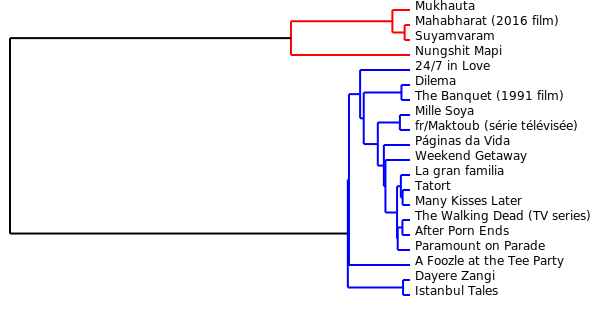

In [72]:
#image = svg_dendrogram(dendrogram2_row, top1_movies, rotate = True  )
image = svg_dendrogram(dendrogram2_row,top1_movies, rotate = True  )
SVG(image)


Third point

In [73]:
labels_col, dendrogram2_col = cut_straight(dendrogram_col, n_clusters = 20, return_dendrogram=True)
#labels_unique_col, counts_col = np.unique(labels, return_counts=True)
labels_unique_col, counts_col = np.unique(labels_col, return_counts=True)

In [74]:
top_actors = []
for cluster_actors in labels_unique_col:
    bipagerank = BiPageRank()
    node_cluster = np.argwhere(labels_col==cluster_actors).ravel()
    seed = {e:1 for e in node_cluster}
    ### when bipagerank make first fit and then get the scores_row_
    bipagerank.fit(biadjacency,seeds_col=seed)
    scores = bipagerank.scores_col_
    # scores[node_cluster] -> we take only the scores of node_cluster
    # top_k returns the argument of the top score
    top_names_actors = node_cluster[top_k(scores[node_cluster], 3)]
    #top_names_actors = top_k(scores[node_cluster], 3)
    top_actors.append(list(actors[top_names_actors]))
top_actors

[['Eric Roberts', 'Danny Trejo', 'Donald Sutherland'],
 ['Moe Howard', 'Larry Fine', 'Oliver Hardy'],
 ['Louis de Funès', 'Gérard Depardieu', 'Totò'],
 ['Andy Lau', 'Simon Yam', 'Eric Tsang'],
 ['Edvard Persson', 'Yevgeny Leonov', 'Mikael Persbrandt'],
 ['Mithun Chakraborty', 'Naseeruddin Shah', 'Dharmendra'],
 ['Mammootty', 'Jagathy Sreekumar', 'Prem Nazir'],
 ['Sara García', 'Gaspar Henaine', 'Federico Luppi'],
 ['Nora Aunor', 'Eugene Domingo', 'Eddie Garcia'],
 ['Faten Hamama', 'Dinos Iliopoulos', 'Hend Sabry'],
 ['Glória Pires', 'José Wilker', 'Selton Mello'],
 ['Evan Stone', 'Beverly Lynne', 'Voodoo'],
 ['Şener Şen', 'Cüneyt Arkın', 'Tarık Akan'],
 ['Nse Ikpe-Etim', 'Majid Michel', 'Ramsey Nouah'],
 ['Parviz Parastui', 'Ezzatolah Entezami', 'Merila Zarei'],
 ['Reza Rahadian', 'Laudya Cynthia Bella', 'Christine Hakim'],
 ['Dilhani Ekanayake', 'Mahendra Perera', 'Sanath Gunathilake'],
 ['Dayahang Rai', 'Aaryan Sigdel', 'Saugat Malla'],
 ['Bala Hijam', 'Gurumayum Bonny', 'Leishangthe

In [75]:
top1_actors = [i[0] for i in top_actors]

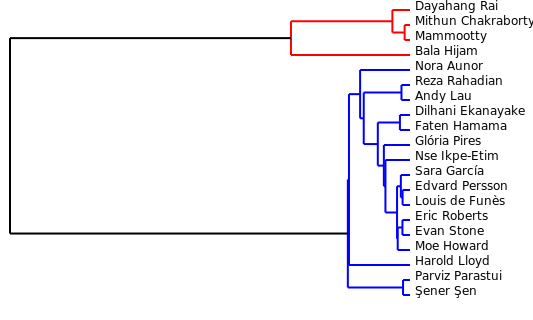

In [76]:
top1_actors = [i[0] for i in top_actors]
image = svg_dendrogram(dendrogram2_col,top1_actors, rotate = True  )
SVG(image)

Fourth point - Give the size and top-3 actors of each nested cluster of Catherine Deneuve.

In [77]:
deneuve = 2173

In [78]:
actors[deneuve]

'Catherine Deneuve'

In [79]:
cluster_nested = get_cluster_nested(dendrogram_col, deneuve)

##########


In [80]:
top_actors = []
bipagerank = BiPageRank()
cluster_i = []
for cluster_Deneuve in cluster_nested:
    cluster_i += cluster_Deneuve
    node_cluster = np.array(cluster_i)
    seed = {e:1 for e in node_cluster}
    ### when bipagerank make first fit and then get the scores_row_
    bipagerank.fit(biadjacency,seeds_col=seed)
    scores = bipagerank.scores_col_
    top_names_actors = node_cluster[top_k(scores[node_cluster], 3)]
    top_actors.append(list(actors[top_names_actors]))
top_actors

[['Catherine Deneuve'],
 ['Michel Piccoli', 'Catherine Deneuve'],
 ['François Sagat', 'Chiara Mastroianni', 'Catherine Deneuve'],
 ['Heinz Weiss', 'François Sagat', 'Hans Peter Hallwachs'],
 ['Raffaëla Anderson', 'Anthony Delon', 'Heinz Weiss'],
 ['Raffaëla Anderson', 'Anthony Delon', 'Heinz Weiss'],
 ['Gérard Depardieu', 'Isabelle Huppert', 'Ingrid Chauvin'],
 ['Gérard Depardieu', 'Isabelle Huppert', 'Catherine Jacob'],
 ['Gérard Depardieu', 'Isabelle Huppert', 'Catherine Jacob'],
 ['Gérard Depardieu', 'Isabelle Huppert', 'Catherine Jacob'],
 ['Louis de Funès', 'Gérard Depardieu', 'Totò'],
 ['Louis de Funès', 'Gérard Depardieu', 'Totò'],
 ['Louis de Funès', 'Gérard Depardieu', 'Edvard Persson'],
 ['Louis de Funès', 'Gérard Depardieu', 'Sara García'],
 ['Moe Howard', 'Larry Fine', 'Christopher Lee'],
 ['Moe Howard', 'Larry Fine', 'Christopher Lee'],
 ['Moe Howard', 'Larry Fine', 'Christopher Lee'],
 ['Moe Howard', 'Larry Fine', 'Christopher Lee'],
 ['Moe Howard', 'Larry Fine', 'Christo